In [1]:
import requests

source = requests.get("https://stacdata.s3.amazonaws.com/highway-primary.geojson").json()

In [2]:
import shapely.geometry

shapely_shapes = [shapely.geometry.shape(fea['geometry']) for fea in source['features']]
aoi_as_multiline = shapely.geometry.MultiLineString(shapely_shapes)

In [3]:
from pystac_client import Client

URL = 'https://earth-search.aws.element84.com/v0/'

client = Client.open(URL)

In [4]:
search = client.search(
    max_items = 10,
    collections = "sentinel-s2-l2a-cogs",
    intersects = aoi_as_multiline,
    datetime = '2022-01-01/2022-01-24'
)

In [5]:
print(f"AOI as Shapely Geometry object from MultiLine(), found {len(list(search.items()))} items")

AOI as Shapely Geometry object from MultiLine(), found 10 items


In [7]:
import stackstac

ds = stackstac.stack(search.get_all_items(),  epsg=4326, assets=["B04", "B03", "B05"] )

In [8]:
search.get_all_items()

ID: S2B_43PGQ_20220123_0_L2A
"Bounding Box: [76.84054354907092, 12.560413606130457, 77.86185827663547, 13.56101248207139]"
Datetime: 2022-01-23 05:25:14+00:00
datetime: 2022-01-23T05:25:14Z
platform: sentinel-2b
constellation: sentinel-2
instruments: ['msi']
gsd: 10
view:off_nadir: 0
proj:epsg: 32643
sentinel:utm_zone: 43


In [9]:
ds.groupby("time.date") # "sentinel:grid_square"

DataArrayGroupBy, grouped over 'date'
2 groups with labels 2022-01-18, 2022-01-23.

In [10]:
import geopandas as gpd

gdf = gpd.GeoDataFrame.from_features(search.get_all_items().to_dict()['features'], "epsg:4326")

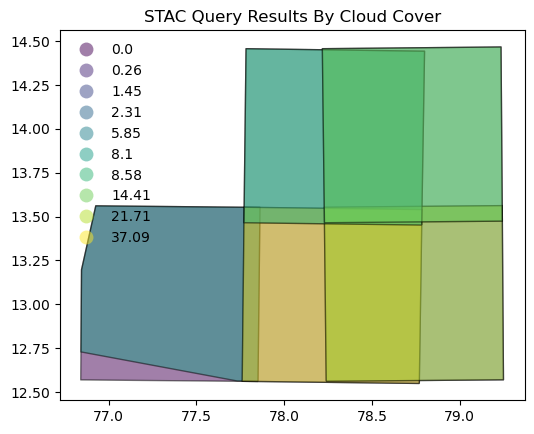

In [11]:
# Colour features by cloud cover
fig = gdf.plot(column='eo:cloud_cover',
         cmap='viridis',
        edgecolor="black",
        categorical=True,
        aspect="equal",
        alpha=0.5,
        figsize=(6, 12),
        legend_kwds={"loc": "upper left", "frameon": False, "ncol": 1},
         legend=True)

_ = fig.set_title("STAC Query Results By Cloud Cover")

### Associated with the talk for [Let's Talk Spatial](https://www.linkedin.com/company/82530406/)

 — By [Aman Bagrecha](https://amanbagrecha.github.io/)